In [17]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import env
from acquire import analyze_playlist
from prepare import handle_nulls
from preprocessing import create_features

In [18]:
#analyze_playlist('spotify:user:afrodeezeemusic', '3P6Pr6iEqvK5fl4UkgdQ7T?si')

In [21]:
df = pd.read_csv('full_playlist_offset.csv', index_col=0)

In [23]:
df.head()

,artist,album,track_name,track_id,danceability,energy,key,loudness,mode,speechiness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature,release_date,explicit,popularity
0,Tay-K,TRAPMAN,TRAPMAN,6mecZbKK3JDeMdFRNxsCV5,0.792,0.594,2,-8.544,1,0.3000,0.000000,0.244,0.351,82.512,232803,4,2020-07-12,True,43.0
1,Lil Wyte,Doubt Me Now,Oxy Cotton,5PtMwNq8Dp31uYdGGacVJE,0.816,0.578,9,-6.912,1,0.2330,0.000000,0.114,0.265,148.077,193920,4,2003-03-04,True,61.0
2,Kamelen,KINGPIN SLIM,Kingpin O.G - Remix,6s8EhlBn2PIoESylkXnwYc,0.649,0.798,0,-6.450,0,0.1450,0.000000,0.409,0.717,160.011,254390,4,2019-11-29,True,22.0
3,Waka Flocka Flame,Flockaveli,Grove St. Party (feat. Kebo Gotti),2e9EZ2V5QGGZPMJacO3y0Y,0.705,0.702,0,-4.783,0,0.1080,0.000000,0.364,0.771,140.059,250493,4,2010-10-01,True,62.0
4,Project Pat,Mista Don't Play: Everythangs Workin',Don't Save Her (feat. Crunchy Black),3ZRd5Z0fiYtASLdEPPb16m,0.838,0.793,11,-5.470,0,0.0773,0.000001,0.106,0.800,160.003,261933,4,2001-02-13,True,45.0


In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 700 entries, 0 to 699
Data columns (total 19 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   artist            700 non-null    object 
 1   album             700 non-null    object 
 2   track_name        700 non-null    object 
 3   track_id          700 non-null    object 
 4   danceability      700 non-null    float64
 5   energy            700 non-null    float64
 6   key               700 non-null    int64  
 7   loudness          700 non-null    float64
 8   mode              700 non-null    int64  
 9   speechiness       700 non-null    float64
 10  instrumentalness  700 non-null    float64
 11  liveness          700 non-null    float64
 12  valence           700 non-null    float64
 13  tempo             700 non-null    float64
 14  duration_ms       700 non-null    int64  
 15  time_signature    700 non-null    int64  
 16  release_date      700 non-null    object 
 1

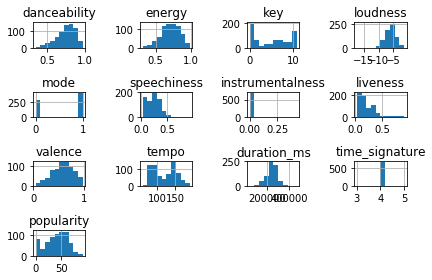

In [26]:
df.drop(columns='explicit').hist()
plt.tight_layout()

In [30]:
for col in df.drop(columns=['artist', 'album']).columns:
    print(df[col].value_counts(),'\n')

How Ya Do Dat                                           2
Game Over                                               2
Pop, Lock & Drop It (feat. Bow Wow & T-Pain) - Remix    2
Knuck If You Buck (feat. Lil' Scrappy)                  2
Good Good Night                                         2
                                                       ..
Frontin'                                                1
Sick Of Being Lonely                                    1
Whole Lotta Choppas (Remix) [feat. Nicki Minaj]         1
I Ain't Hard to Find                                    1
I'm a Playa (feat. Three 6 Mafia)                       1
Name: track_name, Length: 687, dtype: int64 

3n5rIcC04MiNx4T2GOS06g    1
1IlJZCRthVEPlksVzj3JWY    1
0CAh5ReeIyCizdQrZHPG9v    1
33gwZOGJWEZ7dRWPqPxBEZ    1
4QKdiLnJ2fnvfLPUldoryF    1
                         ..
3S78eQqtcfZZhjk7RK5MgD    1
41rPctNLnHkCyfNDRBSBUG    1
3ee8Jmje8o58CHK66QrVC2    1
1KW8BTLgbRCTH8pzUmboLE    1
31tw8G1CMOf4XNAWiwj41u    1
Name: tr

In [34]:
df.nunique()

artist              255
album               448
track_name          687
track_id            700
danceability        351
energy              365
key                  12
loudness            666
mode                  2
speechiness         417
instrumentalness    161
liveness            426
valence             460
tempo               687
duration_ms         680
time_signature        3
release_date        329
explicit              2
popularity           87
dtype: int64

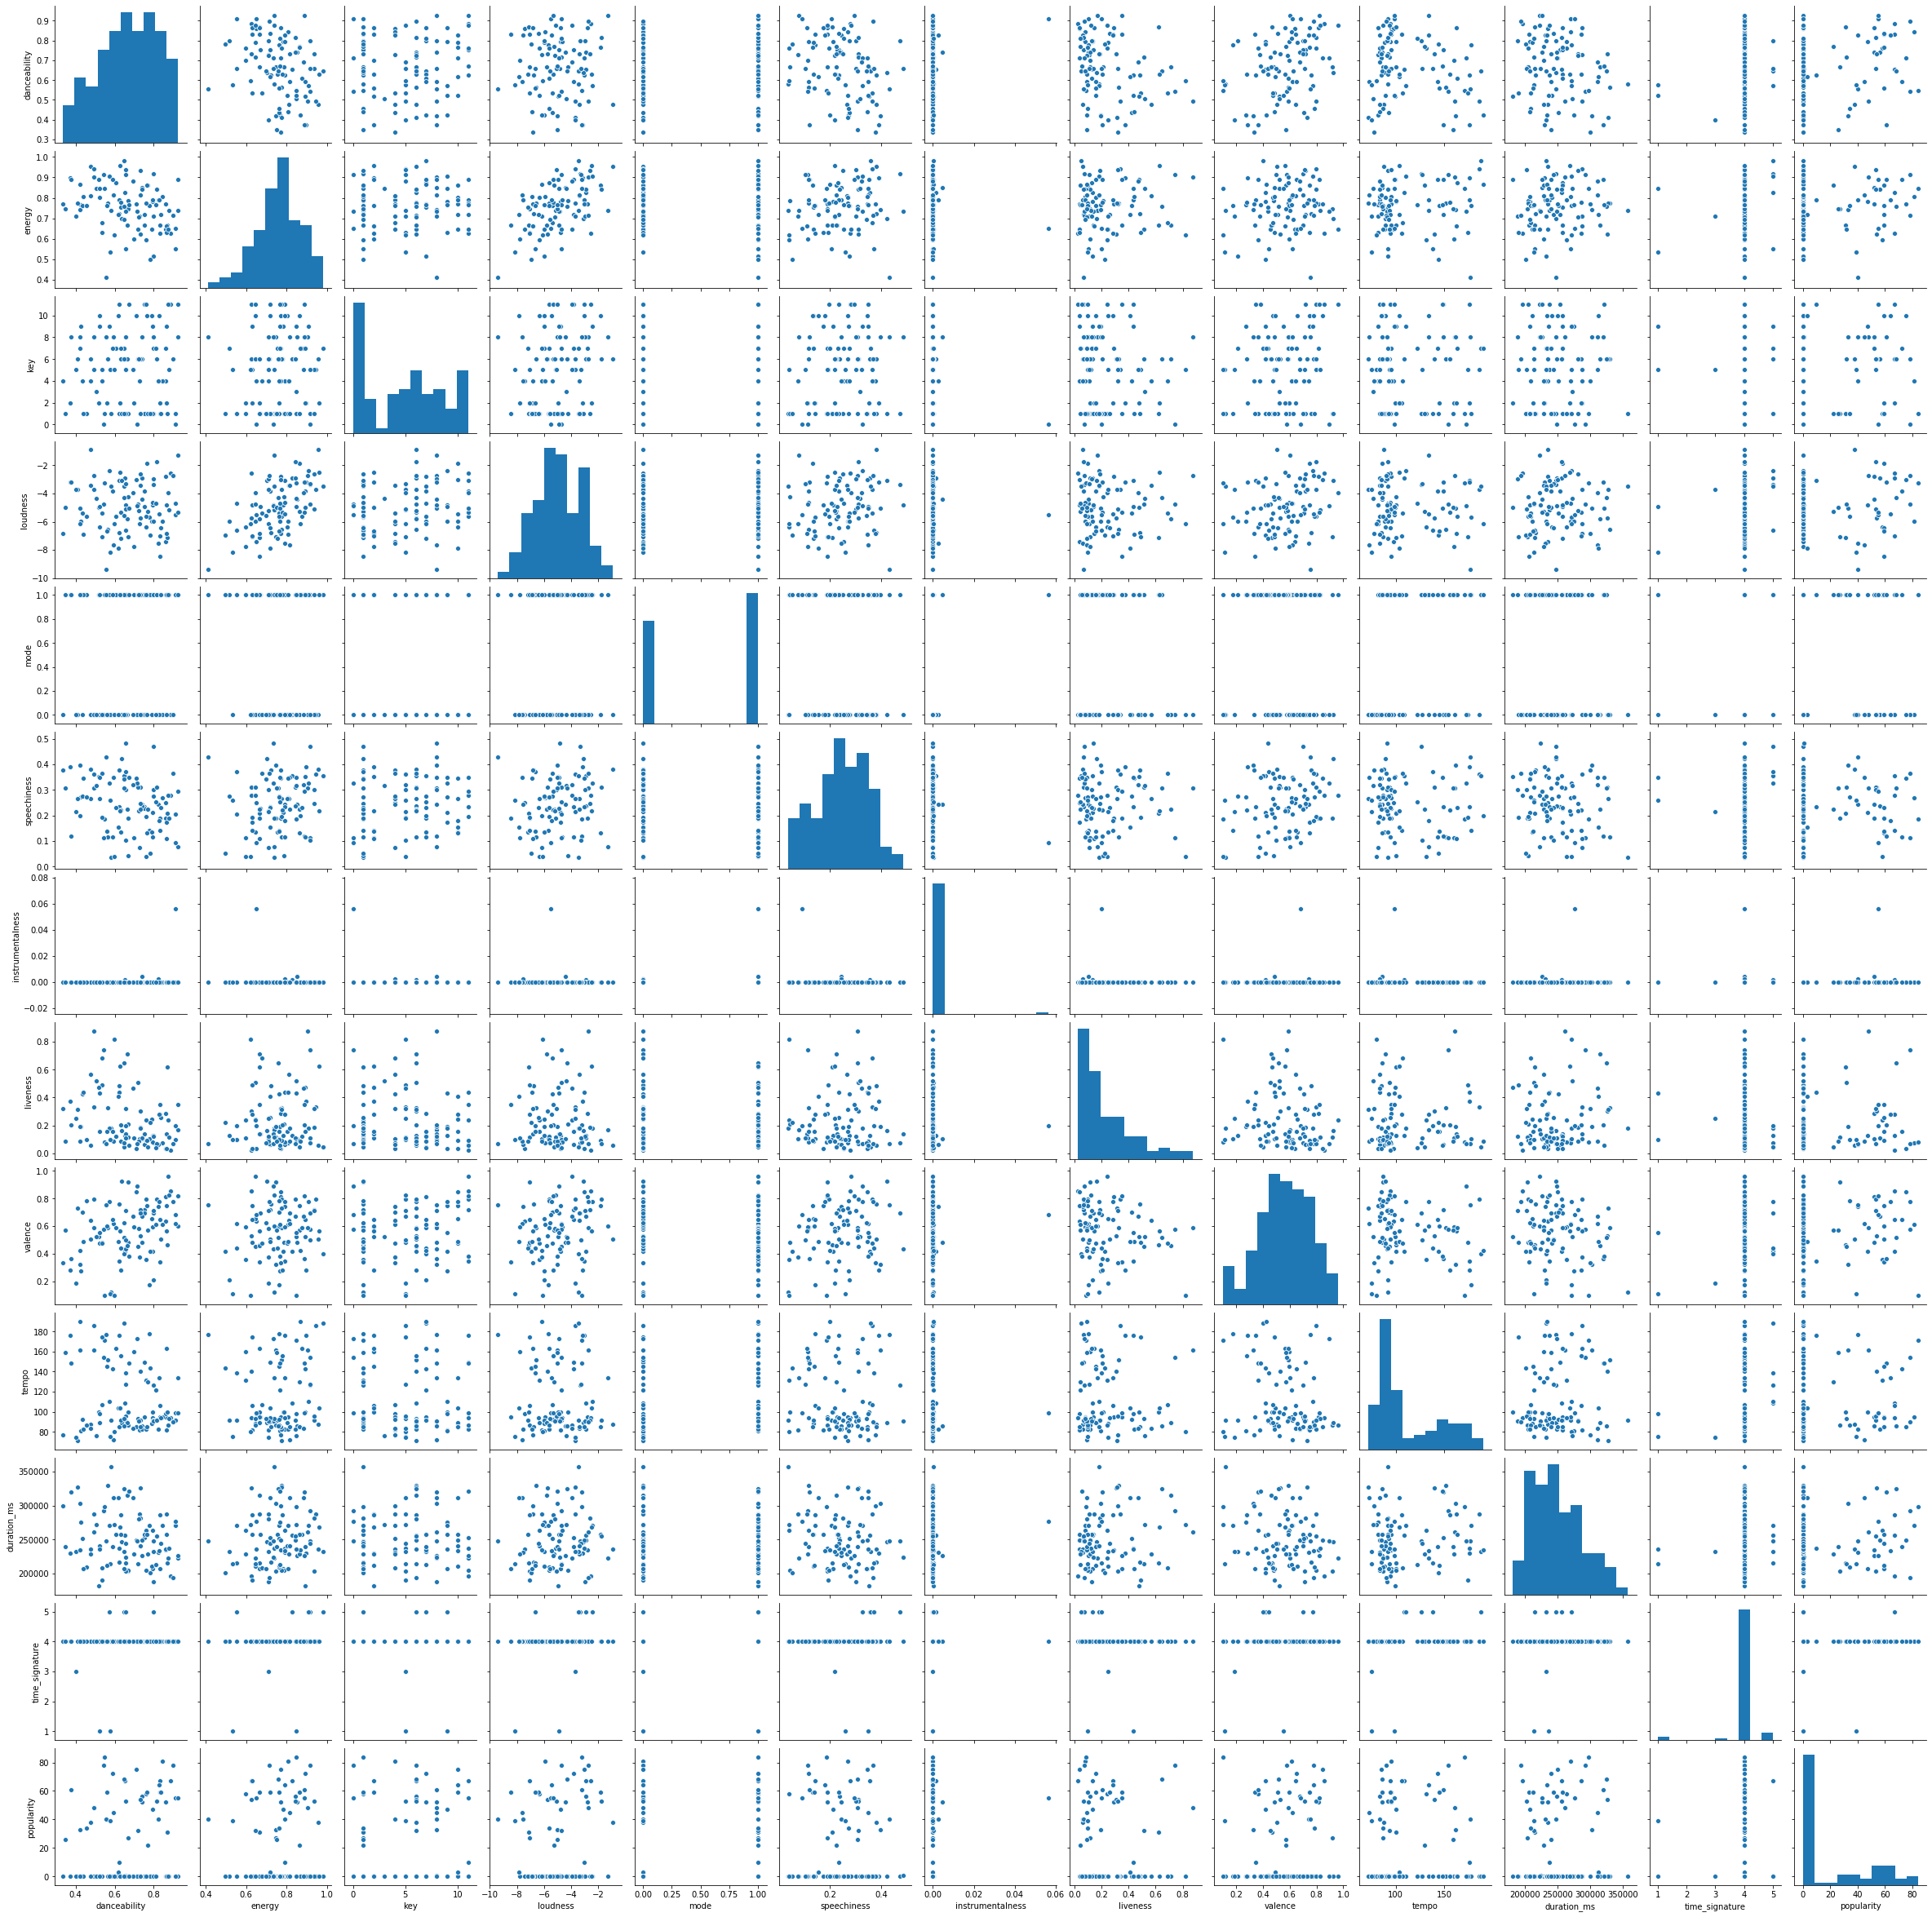

In [9]:
sns.pairplot(df)

Takeaways: 
- We may find some useful clusters since there is some spread in the variable relationships
- There's no apparent linear relationships with popularity
- more data is definitely needed
- seems to be some positive correlation between loudness/energy, danceability/valence (hypo-test)

In [10]:
df.describe()

,danceability,energy,key,loudness,mode,speechiness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature,popularity
count,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.00000
mean,0.668270,0.758310,5.060000,-4.969780,0.560000,0.243556,0.000656,0.236531,0.563950,112.448100,250007.530000,3.980000,21.02000
std,0.152225,0.112008,3.395838,1.721492,0.498888,0.102341,0.005646,0.195857,0.195497,33.611831,37936.397022,0.491955,28.00901
min,0.335000,0.411000,0.000000,-9.396000,0.000000,0.035600,0.000000,0.024000,0.100000,71.094000,181680.000000,1.000000,0.00000
25%,0.559500,0.691250,1.000000,-6.149250,0.000000,0.184250,0.000000,0.094225,0.441250,87.389750,222860.250000,4.000000,0.00000
50%,0.666000,0.764500,5.000000,-5.013500,1.000000,0.242000,0.000000,0.165000,0.586500,95.051000,244213.000000,4.000000,0.00000
75%,0.795250,0.844250,8.000000,-3.473500,1.000000,0.317250,0.000000,0.323500,0.711250,140.865000,271686.750000,4.000000,49.00000
max,0.926000,0.980000,11.000000,-0.905000,1.000000,0.484000,0.056300,0.877000,0.961000,190.276000,357653.000000,5.000000,84.00000


Takeaways: 
- We may find some useful clusters since there is some spread in the variable relationships
- There's no apparent linear relationships with popularity
- more data is definitely needed
- seems to be some positive correlation between loudness/energy, danceability/valence (hypo-test)

In [11]:
df.head()

,artist,album,track_name,track_id,danceability,energy,key,loudness,mode,speechiness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature,release_date,popularity
0,Snoop Dogg,The Best Of Snoop Dogg,Bitch Please,1YrHyDbH17btvI2rFTkbCQ,0.863,0.771,7,-2.770,1,0.1900,0.00000,0.2880,0.812,95.029,234733,4,2005-01-01,52.0
1,The Game,The Documentary,How We Do,6mZcNu9i8uhOYMiEAyEx81,0.862,0.648,4,-7.401,0,0.2510,0.00000,0.0332,0.637,98.012,235533,4,2005,0.0
2,Waka Flocka Flame,No Hands (feat. Roscoe Dash & Wale),No Hands (feat. Roscoe Dash & Wale),6GgPsuz0HEO0nrO2T0QhDv,0.760,0.595,1,-6.366,1,0.0391,0.00000,0.2410,0.361,131.497,263773,4,2010-09-06,58.0
3,Kanye West,My Beautiful Dark Twisted Fantasy,Gorgeous,1yhQGEykn7ZTNLwcIjOAwZ,0.582,0.737,1,-3.477,0,0.0356,0.00008,0.1810,0.122,91.914,357653,4,2010-01-01,0.0
4,JAY-Z,The Hits Collection Volume One [International ...,99 Problems,4HsL5A46wa0O2jQ0ngj3H7,0.478,0.955,6,-0.905,0,0.3800,0.00000,0.0599,0.505,87.522,235467,4,2010-11-22,38.0


> **Question 1**

In [29]:
df.corr()

,danceability,energy,key,loudness,mode,speechiness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature,explicit,popularity
danceability,1.000000,-0.228372,0.007253,-0.142465,-0.000780,-0.154557,0.061886,-0.201927,0.145169,-0.041847,-0.162548,-0.102062,0.071475,0.092903
energy,-0.228372,1.000000,0.043082,0.584656,-0.016659,0.035708,-0.038193,0.122705,0.354391,0.102839,0.147788,0.056218,-0.088728,-0.205875
key,0.007253,0.043082,1.000000,0.007089,-0.195969,-0.057865,-0.057876,0.012911,0.057524,-0.002553,0.067403,-0.079509,-0.010648,-0.006969
loudness,-0.142465,0.584656,0.007089,1.000000,0.013906,-0.131566,-0.025573,0.031392,0.110177,0.106456,0.109463,-0.015533,-0.051451,-0.149794
mode,-0.000780,-0.016659,-0.195969,0.013906,1.000000,0.048864,0.013655,0.066023,-0.054963,-0.005823,-0.061458,-0.039680,-0.032387,-0.032239
speechiness,-0.154557,0.035708,-0.057865,-0.131566,0.048864,1.000000,-0.074622,0.135531,0.203955,-0.062557,0.077957,0.145771,0.044682,-0.071222
instrumentalness,0.061886,-0.038193,-0.057876,-0.025573,0.013655,-0.074622,1.000000,-0.055756,-0.083518,-0.038149,-0.051361,-0.007098,-0.034312,0.066901
liveness,-0.201927,0.122705,0.012911,0.031392,0.066023,0.135531,-0.055756,1.000000,0.080920,-0.026553,0.019559,0.023214,-0.003326,-0.026426
valence,0.145169,0.354391,0.057524,0.110177,-0.054963,0.203955,-0.083518,0.080920,1.000000,0.071392,0.034234,0.014669,-0.086569,-0.146380
tempo,-0.041847,0.102839,-0.002553,0.106456,-0.005823,-0.062557,-0.038149,-0.026553,0.071392,1.000000,-0.027499,-0.040085,0.015408,-0.020597


> **Does liveness have any correlation with a song's popularity?**

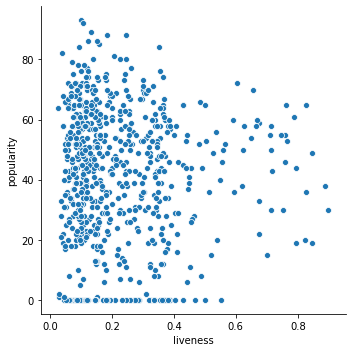

In [33]:
sns.relplot(x='liveness', y='popularity', data=df)